In [13]:
#pip install nba_api

In [14]:
# Inputs:
date = 'July 20, 2021'
player_name = "Giannis Antetokounmpo"
points = '50'
team_nickname = 'bucks'
opponent_nickname = 'suns'
w_l = 'w'
season_type = 'Playoffs'

In [15]:
# Team dictionary for all the relevant info
team_dict = {'celtics': {'Team Name': 'Boston Celtics', 'dot':'forestgreen', 'back': 'silver', 'abbrev': 'BOS'},
             'nets': {'Team Name': 'Brooklyn Nets', 'dot':'silver', 'back': 'dimgray', 'abbrev': 'BKN'},
             'knicks': {'Team Name': 'New York Knicks', 'dot':'mediumblue', 'back': 'orange', 'abbrev': 'NYK'},
             'sixers': {'Team Name': 'Philadelphia 76ers', 'dot':'dodgerblue', 'back': 'dodgerblue', 'abbrev': 'PHI'},
             'raptors': {'Team Name': 'Toronto Raptors', 'dot':'blueviolet', 'back': 'black', 'abbrev': 'TOR'},
             'bulls': {'Team Name': 'Chicago Bulls', 'dot':'white', 'back': 'black', 'abbrev': 'CHI'},
             'cavs': {'Team Name': 'Cleveland Cavaliers', 'dot':'gold', 'back': 'gold', 'abbrev': 'CLE'},
             'pistons': {'Team Name': 'Detroit Pistons', 'dot':'white', 'back': 'royalblue', 'abbrev': 'DET'},
             'pacers': {'Team Name': 'Indiana Pacers', 'dot':'navy', 'back': 'gold', 'abbrev': 'IND'},
             'bucks': {'Team Name': 'Milwaukee Bucks', 'dot':'forestgreen', 'back': 'wheat', 'abbrev': 'MIL'},
             'hawks': {'Team Name': 'Atlanta Hawks', 'dot':'silver', 'back': 'lightcoral', 'abbrev': 'ATL'},
             'hornets': {'Team Name': 'Charlotte Hornets', 'dot':'cyan', 'back': 'c', 'abbrev': 'CHA'},
             'heat': {'Team Name': 'Miami Heat', 'dot':'yellow', 'back': 'black', 'abbrev': 'MIA'},
             'magic': {'Team Name': 'Orlando Magic', 'dot':'orange', 'back': 'cornflowerblue', 'abbrev': 'ORL'},
             'wizards': {'Team Name': 'Washington Wizards', 'dot':'silver', 'back': 'navy', 'abbrev': 'WAS'},
             'nuggets': {'Team Name': 'Denver Nuggets', 'dot':'gold', 'back': 'mediumblue', 'abbrev': 'DEN'},
             'wolves': {'Team Name': 'Minnesota Timberwolves', 'dot':'lightslategrey', 'back': 'steelblue', 'abbrev': 'MIN'},
             'thunder': {'Team Name': 'Oklahoma City Thunder', 'dot':'orange', 'back': 'blue', 'abbrev': 'OKC'},
             'blazers': {'Team Name': 'Portland Trail Blazers', 'dot':'white', 'back': 'salmon', 'abbrev': 'POR'},
             'jazz': {'Team Name': 'Utah Jazz', 'dot':'yellow', 'back': 'darkorchid', 'abbrev': 'UTA'},
             'warriors': {'Team Name': 'Golden State Warriors', 'dot':'gold', 'back': 'darkblue', 'abbrev': 'GSW'},
             'clippers': {'Team Name': 'Los Angeles Clippers', 'dot':'green', 'back': 'silver', 'abbrev': 'LAC'},
             'lakers': {'Team Name': 'Los Angeles Lakers', 'dot':'gold', 'back': 'rebeccapurple', 'abbrev': 'LAL'},
             'suns': {'Team Name': 'Phoenix Suns', 'dot':'orange', 'back': 'darkviolet', 'abbrev': 'PHO'},
             'kings': {'Team Name': 'Sacramento Kings', 'dot':'lightgray', 'back': 'darkviolet', 'abbrev': 'SAC'},
             'mavs': {'Team Name': 'Dallas Mavericks', 'dot':'forestgreen', 'back': 'b', 'abbrev': 'DAL'},
             'rockets': {'Team Name': 'Houston Rockets', 'dot':'green', 'back': 'black', 'abbrev': 'HOU'},
             'grizzlies': {'Team Name': 'Memphis Grizzlies', 'dot':'gold', 'back': 'steelblue', 'abbrev': 'MEM'},
             'pelicans': {'Team Name': 'New Orleans Pelicans', 'dot':'goldenrod', 'back': 'firebrick', 'abbrev': 'NOLA'},
             'spurs': {'Team Name': 'San Antonio Spurs', 'dot':'white', 'back': 'silver', 'abbrev': 'SAS'}}

# Inputs off the Nicknames:
team_name = team_dict[team_nickname]['Team Name']
opponent_abrev = team_dict[opponent_nickname]['abbrev']
background_color = team_dict[team_nickname]['back']
dot_color = team_dict[team_nickname]['dot']


# Import Libraries

import pandas as pd
import numpy as np

# Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib.patches import Circle, Rectangle, Arc, ConnectionPatch

# Matplotlib Image Properties
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# Image library for automatic post-generation
from PIL import Image

# FONT:
prop = fm.FontProperties(fname='LeagueSpartan-Bold.otf')

# Connecting to the NBA API

# Player Data
from nba_api.stats.static import players
player_dict = players.get_players()
players = pd.DataFrame(player_dict)

# Team Data 
from nba_api.stats.static import teams
teams = teams.get_teams()
teams = pd.DataFrame(teams)

# ShortChartDetail Endpoint for Shot Location Data
from nba_api.stats.endpoints import shotchartdetail

#Drawing the court
def draw_court(ax=None, color='black', lw=2):
    # If an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = plt.gca()

    # Create the various parts of an NBA basketball court

    # Create the basketball hoop
    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)

    # Create backboard
    backboard = Rectangle((-30, -7.5), 60, -1, linewidth=lw, color=color)

    # The paint
    # Create the outer box 0f the paint, width=16ft, height=19ft
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color,
                          fill=False)
    
    # Create the inner box of the paint, widt=12ft, height=19ft
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color,
                          fill=False)

    # Create free throw top arc
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False)
    # Create free throw bottom arc
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,
                            linewidth=lw, color=color, linestyle='dashed')
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw,
                     color=color)

    # Three point line
    # Create the side 3pt lines, they are 14ft long before they begin to arc
    corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw,
                               color=color)
    corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
    three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw,
                    color=color)

    # Center Court
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0,
                           linewidth=lw, color=color)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0,
                           linewidth=lw, color=color)

    # Draw the half court line, baseline and side out bound lines
    outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=lw,
                             color=color, fill=False)
    
    # List of the court elements to be plotted onto the axes
    # Add outer_box to court elements if needed
    court_elements = [hoop, backboard, inner_box, top_free_throw,
                      bottom_free_throw, restricted, corner_three_a,
                      corner_three_b, three_arc, center_outer_arc,
                      center_inner_arc, outer_lines]

    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)

    return ax

# Month to number:
month_dict = {'January' : '01',
              'February' : '02',
              'March' : '03',
              'April' : '04',
              'May' : '05',
              'June' : '06',
              'July' : '07',
              'August' : '08',
              'September' : '09', 
              'October' : '10',
              'November' : '11',
              'December' : '12'}

# Calling the relevant Player Data:
def shotchart_df(player_name, team_name, date, season_type):
    pid = players[players['full_name'] == player_name]['id'].values[0]
    tid = teams[teams['full_name'] == team_name]['id'].values[0]
    
    df = shotchartdetail.ShotChartDetail(player_id=pid, 
         team_id=tid, context_measure_simple = 'FGA', 
         season_type_all_star=season_type).get_data_frames()[0]
    
    year = date[-4:]
    month = month_dict[date.split(',')[0].split(' ')[0]]
    day = date.split(',')[0].split(' ')[1]
    if int(day) < 10:
        day = '0' + day
    final_date = year + month + day
    
    return df[df['GAME_DATE'] == final_date], pid, tid

# Putting it all together:
def draw(season_type, date, player_name, points, team_name, opponent_abrev, w_l, background_color, dot_color, pic):
    ret = shotchart_df(player_name, team_name, date, season_type)
    df = ret[0]
    pid = ret[1]
    tid = ret[2]
    
    # Visual Settings
    sns.set(style='white', rc={'axes.facecolor':'black', 'figure.figsize':(11,11)})

    # Drawing the court
    draw_court(color="white", lw=2)
    
    # Plotting the shots 
    markers = {0: 'X', 1: 'o'}
    sns.scatterplot('LOC_X', 'LOC_Y', data=df, hue='SHOT_MADE_FLAG', style='SHOT_MADE_FLAG', 
                    palette=['red', dot_color], markers=markers, s=150);
    
    # Limiting the Plot
    plt.xlim(-300,300)
    plt.ylim(-100,500)

    # Raw save
    plt.savefig('chart.png');

    # Opens a image in RGB mode 
    im = Image.open('chart.png') 

    # Setting the points for cropped image, according to typical Raw save
    left = 149
    top = 171
    right = 663
    bottom = 642

    # Cropped image of above dimension 
    im1 = im.crop((left, top, right, bottom)) 

    # Shows the image in image viewer 
    # CALLING SAVE ON 'chart.png' REPLACES ORIGINAL SAVE
    im1.rotate(180).save('chart.png')
    
    
    
    # Creating graphic:
    sns.set(style='white', rc={'axes.facecolor':background_color})
    fig = plt.figure(figsize=(12,12))
    ax=fig.add_subplot(1,1,1)
    ax.set_xlim(-0.5, 0.5)
    ax.set_ylim(0, 1)

    # Adding shotchart:
    chart = plt.imread('chart.png') 
    ax.add_artist(AnnotationBbox(OffsetImage(chart, zoom=0.75), (0, 0.5), frameon=False, pad=0.5))

    # Adding FBS Logo:
    logo = plt.imread('logo.png') 
    ax.add_artist(AnnotationBbox(OffsetImage(logo, zoom=0.20), (-0.475, 0.9725), frameon=False, pad=0.5))

    
    # FBS
    plt.text(-0.45, 0.960, 'FBS', fontproperties=prop, size=16, color = 'White');

    # Source
    plt.text(0.33, 0.98, 'Source: NBA.com', fontproperties=prop, size=12, color = 'White');

    # Player Name
    plt.text(-0.29, 0.825, player_name, fontproperties=prop, size=20, color = 'White');

    # Date
    plt.text(-0.29, 0.785, date, fontproperties=prop, size=18, color = 'White');

    # Points
    plt.text(-0.29, 0.20, points + ' PTS', fontproperties=prop, size=18, color = 'White');

    # W/L
    outcome_color = 'red'
    if w_l.upper() == 'W':
        outcome_color = 'g'
    plt.text(-0.29, 0.165, w_l.upper() + '(' + opponent_abrev + ')', fontproperties=prop, size=16, color = outcome_color);

    # Adding Player pic if pic == False:
    if pic == True:
        #url = 'https://ak-static.cms.nba.com/wp-content/uploads/headshots/nba/' + str(tid) + '/2020/260x190/' + str(pid) + '.png'
        url = 'https://cdn.nba.com/headshots/nba/latest/1040x760/' + str(pid) + '.png'
        player = plt.imread(url) 
        ax.add_artist(AnnotationBbox(OffsetImage(player, zoom=0.3), (0.28, 0.16), frameon=False, pad=0.5))
    
    # Raw save
    plt.savefig('final.png');

    # Opens a image in RGB mode 
    imfinal = Image.open('final.png') 

    # Setting the points for cropped image, according to typical Raw save
    left = 108
    top = 104
    right = 778
    bottom = 756

    # Cropped image of above dimension 
    imfinalpost = imfinal.crop((left, top, right, bottom)) 

    # Shows the image in image viewer 
    # CALLING SAVE ON 'chart.png' REPLACES ORIGINAL SAVE
    imfinalpost.save('final.png')



/Users/milan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


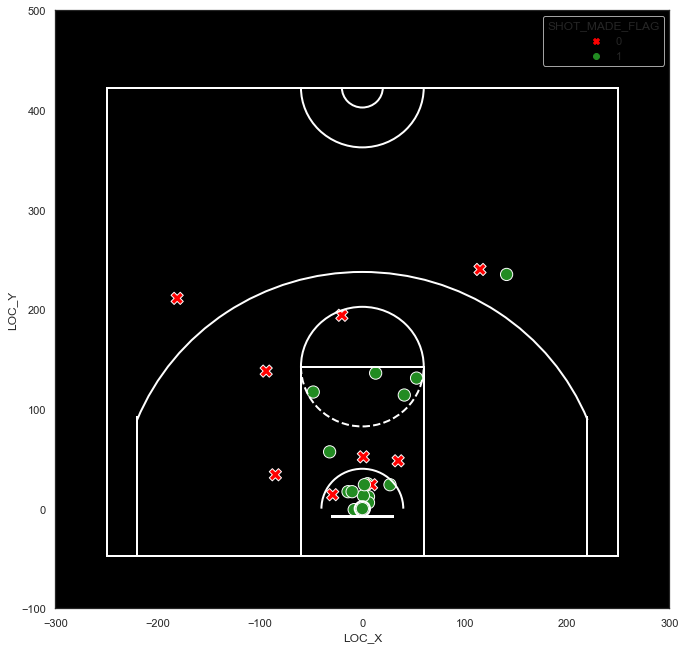

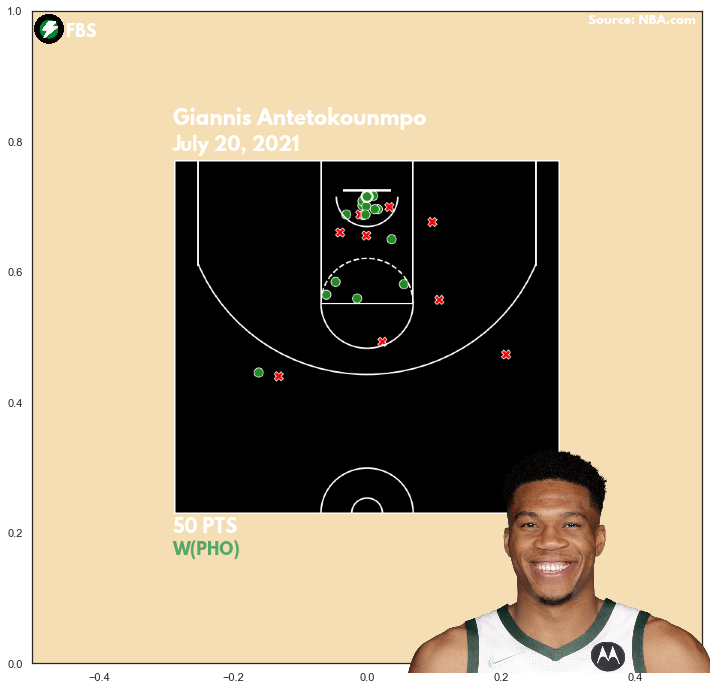

In [16]:
draw(season_type, date, player_name, points, team_name, opponent_abrev, w_l, background_color, dot_color, True)

